In [24]:
#caculate autocorrealtion for 1 day lag for each stock
import numpy as np
import pandas as pd

def correlation(x, y):
    x = np.array(x)
    y = np.array(y)
    return x @ y / (np.sqrt(x @ x) * np.sqrt(y @ y))

def autocorr(stock):
    #('../data_CHN/' + stock + '.csv')
    data = pd.read_csv('../data_CHN/' + stock + '.csv')
    data['trade_date'] = pd.to_datetime(data['trade_date'])
    data = data.set_index('trade_date')
    data = data['close']
    data = data.pct_change()
    data = data.dropna()
    print(correlation(data[:-1], data[1:]))
    return data.autocorr(lag=1)

stock_id = pd.read_csv('stocks_index.csv')['ts_code']

autocorr_df = pd.DataFrame(index=['autocorr'], columns=stock_id)
for stock in stock_id:
    #add column for each stock
    try:
        autocorr_df[stock] = autocorr(stock)
        print(autocorr_df[stock])
    except:
        continue

autocorr_df.to_csv('autocorr.csv', index=False)



0.014889966298319313
autocorr    0.014622
Name: 000001.SZ, dtype: float64
0.020638415967258326
autocorr    0.020367
Name: 000002.SZ, dtype: float64
0.0965572924602528
autocorr    0.096373
Name: 000004.SZ, dtype: float64
0.03127632672113015
autocorr    0.030906
Name: 000006.SZ, dtype: float64
0.133355792281965
autocorr    0.133043
Name: 000007.SZ, dtype: float64
0.07666457366306123
autocorr    0.075924
Name: 000008.SZ, dtype: float64
0.05484739118319215
autocorr    0.054719
Name: 000009.SZ, dtype: float64
0.05334976381667368
autocorr    0.052889
Name: 000010.SZ, dtype: float64
0.08745412931138612
autocorr    0.087265
Name: 000011.SZ, dtype: float64
0.0511158742897491
autocorr    0.050871
Name: 000012.SZ, dtype: float64
0.07123535451571933
autocorr    0.071019
Name: 000014.SZ, dtype: float64
0.05285524610870968
autocorr    0.052314
Name: 000016.SZ, dtype: float64
0.12498095343723413
autocorr    0.124714
Name: 000017.SZ, dtype: float64
0.07934023875195426
autocorr    0.07899
Name: 000019.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


0.032627044758008705
autocorr    0.032493
Name: 600027.SH, dtype: float64
0.010477309540559062
autocorr    0.010428
Name: 600028.SH, dtype: float64
0.08314852260829653
autocorr    0.083025
Name: 600029.SH, dtype: float64
0.0008719552016633962
autocorr    0.00084
Name: 600030.SH, dtype: float64
0.04148974758550614
autocorr    0.041196
Name: 600031.SH, dtype: float64
0.11357613636311062
autocorr    0.113554
Name: 600032.SH, dtype: float64
-0.010811816680555683
autocorr   -0.011153
Name: 600033.SH, dtype: float64
0.032758467054959516
autocorr    0.032504
Name: 600035.SH, dtype: float64
0.0009661067581730018
autocorr    0.000961
Name: 600036.SH, dtype: float64
0.04917972459911617
autocorr    0.048645
Name: 600037.SH, dtype: float64
0.05604095543684631
autocorr    0.05591
Name: 600038.SH, dtype: float64
0.04411866879835265
autocorr    0.043804
Name: 600039.SH, dtype: float64
0.03877256496769697
autocorr    0.038299
Name: 600048.SH, dtype: float64
-0.015164304802804745
autocorr   -0.015223
N

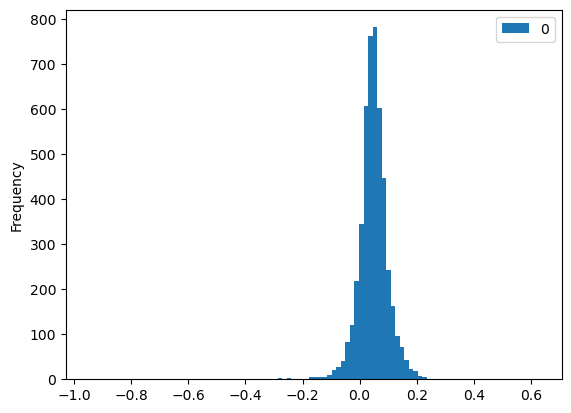

0    0.047759
dtype: float64


In [27]:
#plot autocorrelation for each stock (not nan)

import matplotlib.pyplot as plt
import pandas as pd

autocorr_df = pd.read_csv('autocorr.csv')
autocorr_df = autocorr_df.dropna(axis=1)
autocorr_df = autocorr_df.T
autocorr_df.plot(kind='hist', bins=100)
plt.show()

#mean and std of autocorrelation
print(autocorr_df.mean())

In [18]:

def general_analysis(func, label = 'result'):
    stock_id = pd.read_csv('stocks_index.csv')['ts_code']
    result = pd.DataFrame(index=[label], columns=stock_id)
    for stock in stock_id:
        data = pd.read_csv('../data_CHN/' + stock + '.csv')
        result[stock] = func(data)
    return result

In [19]:
general_analysis(lambda x: x['close'].mean(), 'mean').to_csv('mean.csv', index=False)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

0.00167251359570506
0.032165591491367114


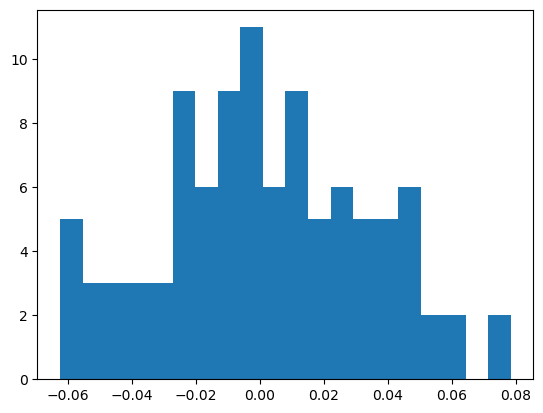

In [23]:
#random distribution N(mu, sigma), generate n samples
def random_distribution(n, mu, sigma = 1):
    return np.random.normal(mu, sigma, n)

sim_corr = []
for _ in range(100):
    for n in [1000]:
        for mu in [0]:
            data = random_distribution(n, mu)
            # print(correlation(data[:-1], data[1:]))
            # print(pd.Series(data).autocorr(lag=1))
            # print('-----------------')
            sim_corr.append(correlation(data[:-1], data[1:]))

print(np.mean(sim_corr))
print(np.std(sim_corr))
import matplotlib.pyplot as plt
plt.hist(sim_corr, bins=20)
plt.show()

In [14]:
sim_corr

,0,1,2
10,-0.044734,0.287454,0.641937
100,-0.143532,0.351172,0.761281
1000,0.06577,0.508875,0.79796
